In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
import warnings
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
drive.mount('/content/drive')

X_train = pd.read_csv('/content/drive/MyDrive/Data Mining/data/X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Data Mining/data/X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Data Mining/data/y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Data Mining/data/y_test.csv')

Mounted at /content/drive


In [3]:
y_train = y_train.iloc[:, 1]
y_test = y_test.iloc[:, 1]
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [4]:
clf = svm.SVC(kernel='rbf', random_state = 1, probability=True)
clf.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [5]:
y_pred = clf.predict(X_test)

In [6]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6727


### Confusion Matrix

In [7]:
confusionMatrix = confusion_matrix(y_test, y_pred)

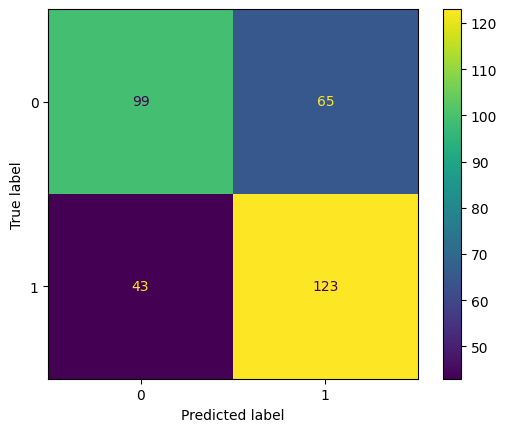

In [8]:
ConfusionMatrixDisplay(confusionMatrix).plot()

In [9]:
accuracy_score(y_test, y_pred)

0.6727272727272727

In [10]:
precision_score(y_test, y_pred)

0.6542553191489362

In [11]:
recall_score(y_test, y_pred)

0.7409638554216867

In [12]:
f1_score(y_test, y_pred)

0.6949152542372882

In [13]:
y_proba = clf.predict_proba(X_test)[:,1]

In [14]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_proba)

In [15]:
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_proba))

roc_auc_score for SVM:  0.7429473993535116


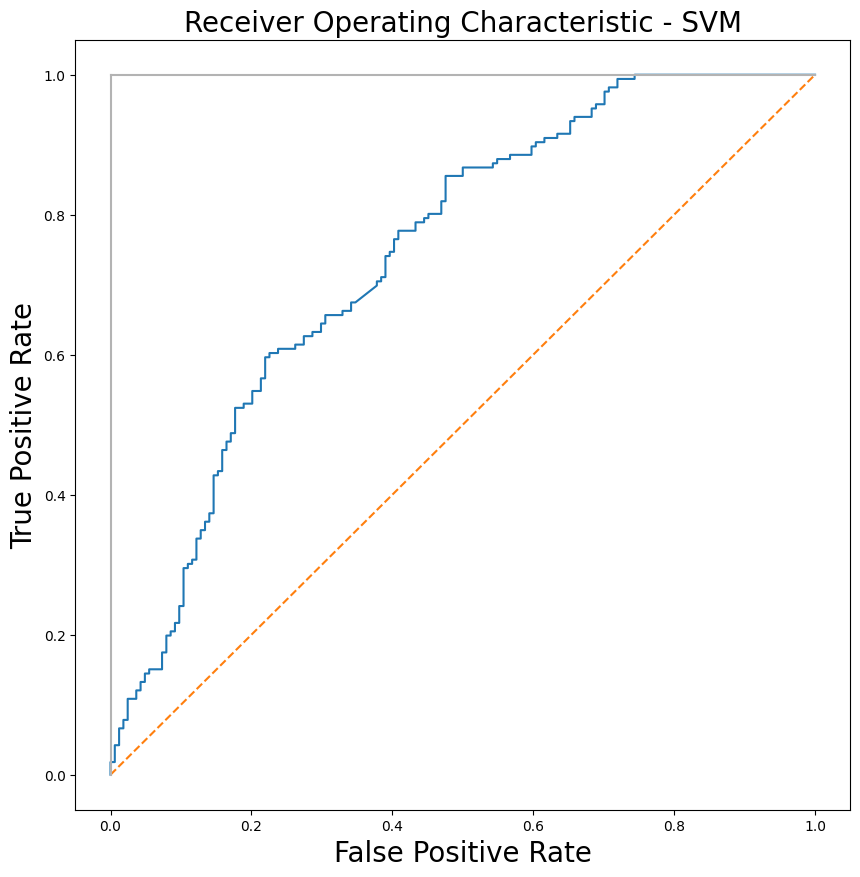

In [16]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM', fontsize=20)
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.show()